In [46]:
#Import Of Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#Data Pre-Processing
data=pd.read_csv("master.csv")

In [48]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [49]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [50]:
#Data Cleaning
data["gdp_for_year"]=data[" gdp_for_year"]

In [51]:
data.drop(" gdp_for_year",axis=1,inplace=True)

In [52]:
data["gdp_for_year"]=data.gdp_for_year.str.replace(",","")

In [55]:
data["gdp_for_year"]=data["gdp_for_year"].astype(float)

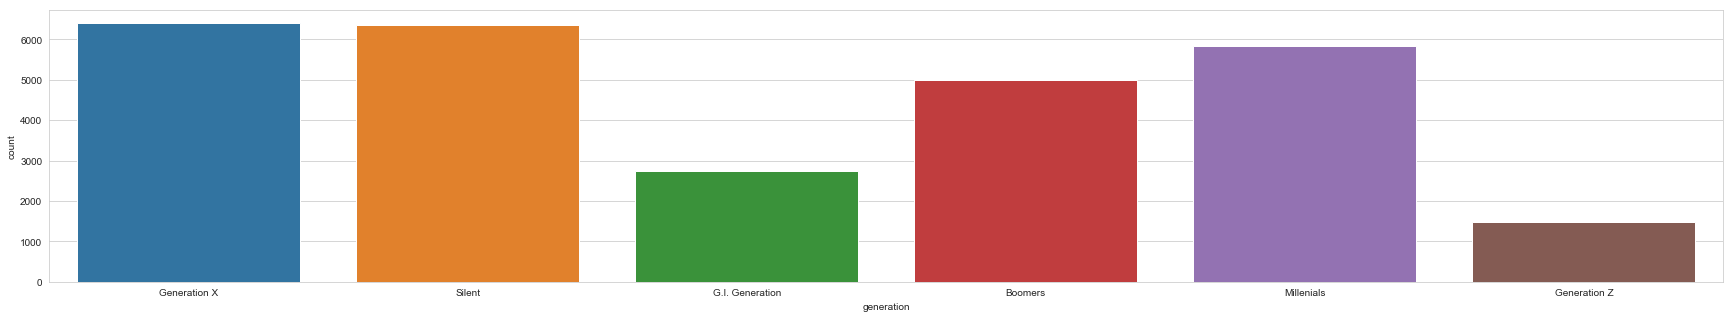

In [56]:
plt.figure(figsize=(30,5))
sns.countplot(data['generation'])

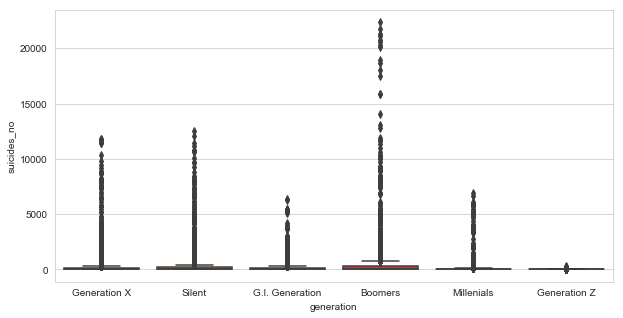

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(x='generation',y='suicides_no',data=data)

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder1=LabelEncoder()
data["sex"]=label_encoder1.fit_transform(data["sex"])

In [10]:
label_encoder2=LabelEncoder()
data["generation"]=label_encoder2.fit_transform(data["generation"])

In [11]:
data=data.fillna(0)

In [12]:
data.drop(columns=["country","country-year","age"],axis=1,inplace=True)

In [13]:
data.head()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,1987,1,21,312900,6.71,0.0,796,2,2.156625e+09
1,1987,1,16,308000,5.19,0.0,796,5,2.156625e+09
2,1987,0,14,289700,4.83,0.0,796,2,2.156625e+09
3,1987,1,1,21800,4.59,0.0,796,1,2.156625e+09
4,1987,1,9,274300,3.28,0.0,796,0,2.156625e+09


In [14]:
data.dtypes

year                   int64
sex                    int32
suicides_no            int64
population             int64
suicides/100k pop    float64
HDI for year         float64
gdp_per_capita         int64
generation             int32
gdp_for_year         float64
dtype: object

In [15]:
#Correlation Matrix
data.corr()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
year,1.000000,0.000000e+00,-0.004546,0.008850,-0.039037,3.431898e-01,3.391343e-01,2.683006e-01,9.452857e-02
sex,0.000000,1.000000e+00,0.144629,-0.011242,0.391496,3.061582e-18,1.336263e-18,-4.145525e-19,-7.757932e-19
suicides_no,-0.004546,1.446292e-01,1.000000,0.616162,0.306604,-1.730773e-02,6.132975e-02,-7.062371e-02,4.300959e-01
population,0.008850,-1.124208e-02,0.616162,1.000000,0.008285,9.374731e-03,8.150986e-02,-6.796261e-02,7.106973e-01
suicides/100k pop,-0.039037,3.914965e-01,0.306604,0.008285,1.000000,-2.290278e-02,1.785134e-03,-4.982007e-02,2.523964e-02
HDI for year,0.343190,3.061582e-18,-0.017308,0.009375,-0.022903,1.000000e+00,2.165182e-01,4.865837e-02,7.375306e-02
gdp_per_capita,0.339134,1.336263e-18,0.061330,0.081510,0.001785,2.165182e-01,1.000000e+00,8.289921e-02,3.034045e-01
generation,0.268301,-4.145525e-19,-0.070624,-0.067963,-0.049820,4.865837e-02,8.289921e-02,1.000000e+00,2.125070e-02
gdp_for_year,0.094529,-7.757932e-19,0.430096,0.710697,0.025240,7.375306e-02,3.034045e-01,2.125070e-02,1.000000e+00


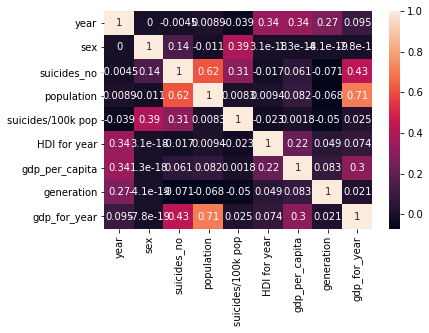

In [16]:
sns.heatmap(data.corr(),annot=True)

In [17]:
#Train and Test Data
train=data.drop("suicides_no",axis=1)
test=data["suicides_no"]

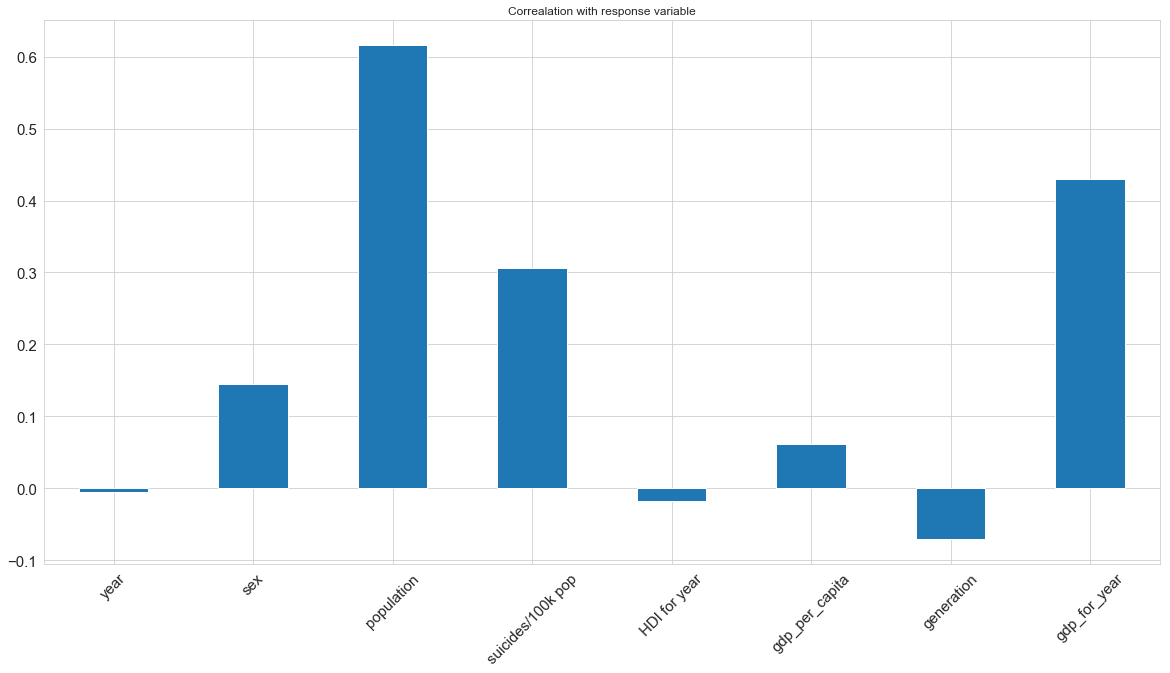

In [21]:
train.corrwith(test).plot.bar(figsize=(20,10),
                                           title="Correalation with response variable",
                                           fontsize=15,rot=45,grid=True)

In [23]:
train.head()

,year,sex,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,1987,1,312900,6.71,0.0,796,2,2.156625e+09
1,1987,1,308000,5.19,0.0,796,5,2.156625e+09
2,1987,0,289700,4.83,0.0,796,2,2.156625e+09
3,1987,1,21800,4.59,0.0,796,1,2.156625e+09
4,1987,1,274300,3.28,0.0,796,0,2.156625e+09


In [20]:
sns.set_style('whitegrid')

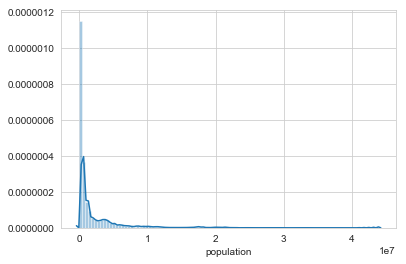

In [25]:
sns.distplot(train['population'],bins=100)

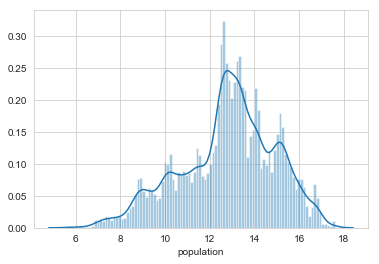

In [27]:
sns.distplot(np.log(train['population']),bins=100)

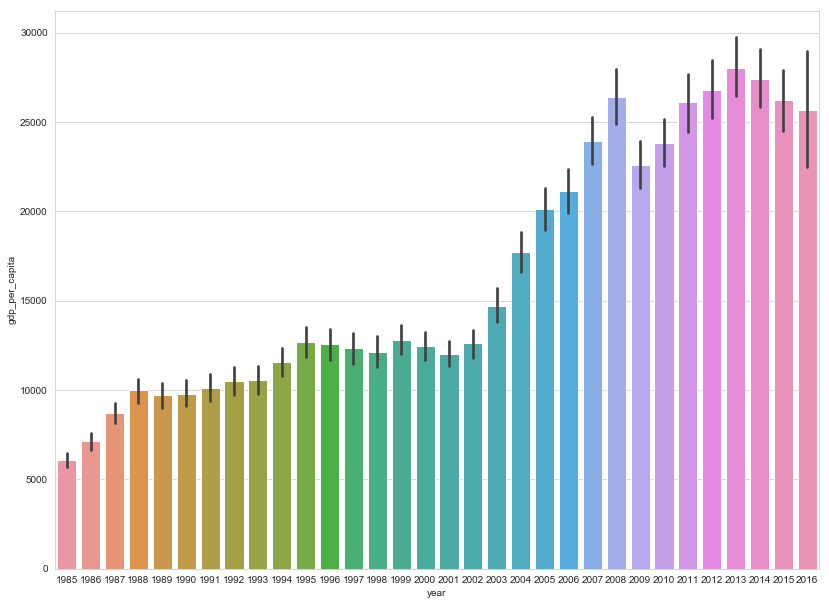

In [38]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13.7, 10.27)
sns.barplot(x='year',y='gdp_per_capita',data=train,ax=ax)

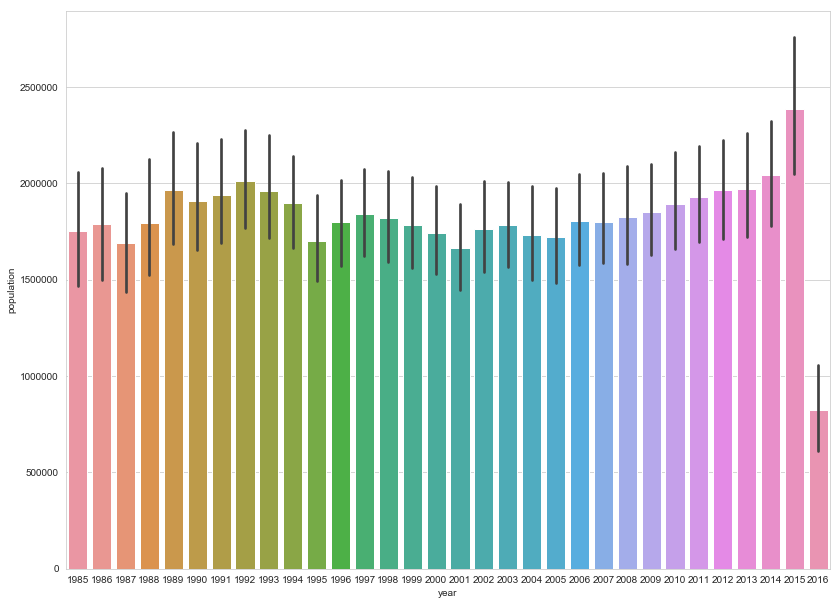

In [43]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13.7, 10.27)
sns.barplot(x='year',y='population',data=train)

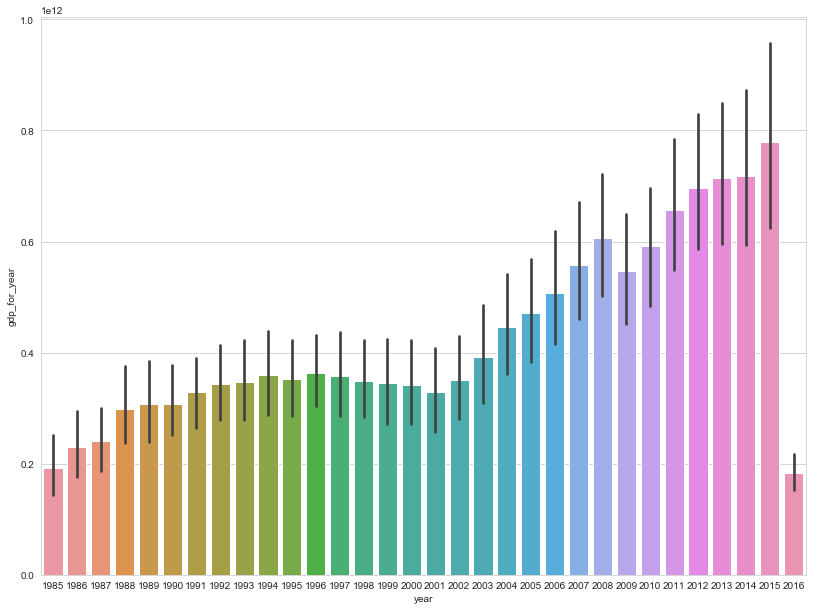

In [44]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13.7, 10.27)
sns.barplot(x='year',y='gdp_for_year',data=train,ax=ax)

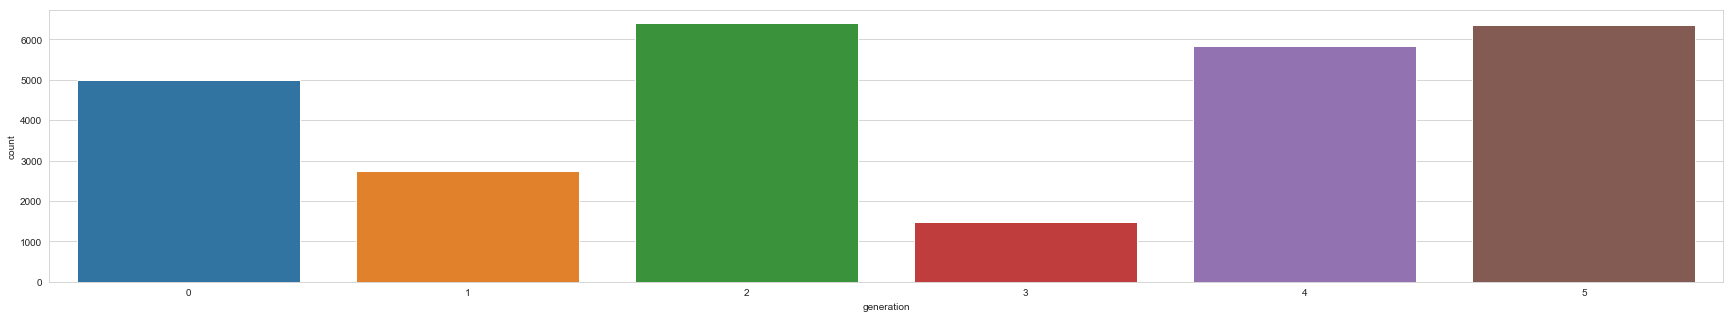

In [36]:
plt.figure(figsize=(30,5))
sns.countplot(data['generation'])

In [47]:
dfs=pd.DataFrame(columns=("Algorithm","Accuracy"))

In [48]:
dfs

,Algorithm,Accuracy


In [21]:
#Library for Training Model
from sklearn import model_selection

In [22]:
#Train Test Split
x_train,x_test,y_train,y_test=model_selection.train_test_split(train,test)

In [24]:
#Training will be done by RandomForest Algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [25]:
alg1=RandomForestRegressor(n_estimators=50,random_state=0,criterion="mse")
alg1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
alg2=DecisionTreeClassifier()
alg2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
alg3=LogisticRegression()
alg3.fit(x_train,y_train)

C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
alg4=GaussianNB()
alg4.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
alg5=KNeighborsClassifier()
alg5.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
def sc(y_truth,y_pred1):
    u=((y_truth-y_pred1)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-(u/v)

In [34]:
#Prediction
y_pred_1=alg1.predict(x_test)
y_pred_2=alg2.predict(x_test)
y_pred_3=alg3.predict(x_test)
y_pred_4=alg4.predict(x_test)
y_pred_5=alg5.predict(x_test)

In [36]:
print("Random Forest accuracy:",sc(y_test,y_pred_1))
print("Decesion Tree accuracy:",sc(y_test,y_pred_2))
print("Logistic Regression accuracy:",sc(y_test,y_pred_3))
print("Naive Bayes accuracy:",sc(y_test,y_pred_4))
print("Kmean accuracy:",sc(y_test,y_pred_5))

Random Forest accuracy: 0.9984506826894487
Decesion Tree accuracy: 0.8506866836690785
Logistic Regression accuracy: -6.832256270698093
Naive Bayes accuracy: -1.0083886678126444
Kmean accuracy: 0.021179516085082395


In [54]:
dfs.loc[1]=["Random Forest",sc(y_test,y_pred_1)]
dfs.loc[2]=["Decision Tree",sc(y_test,y_pred_2)]
dfs.loc[3]=["Logistic Regression",sc(y_test,y_pred_3)]
dfs.loc[4]=["Naive Bayes",sc(y_test,y_pred_4)]
dfs.loc[5]=["K-Means",sc(y_test,y_pred_5)]

In [56]:
dfs

,Algorithm,Accuracy
1,Random Forest,0.998451
2,Decision Tree,0.850687
3,Logistic Regression,-6.832256
4,Naive Bayes,-1.008389
5,K-Means,0.021180


Text(0, 0.5, 'Accuracies')

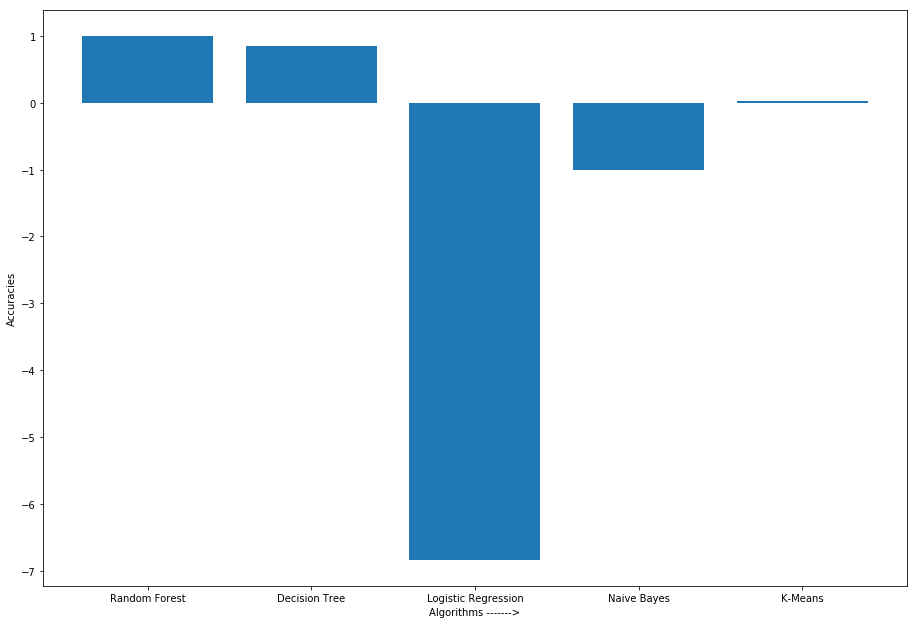

In [70]:
#Bar Plot to determine best algorithm with best accuracy
fig=plt.figure()
axes=fig.add_axes([2,2,2,2])
axes.bar(dfs["Algorithm"],dfs["Accuracy"])
axes.set_xlabel("Algorithms ------->")
axes.set_ylabel("Accuracies")

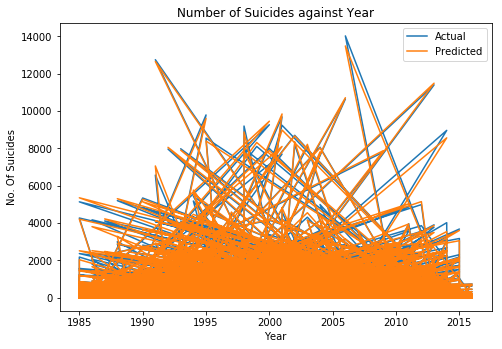

In [71]:
#Plotting of Predicted Data against Actual Data
fig=plt.figure()
ax=fig.add_axes([1,1,1,1])
y=y_test
x=x_test["year"]
y1=y_pred_1
ax.plot(x,y,label="Actual")
ax.plot(x,y1,label="Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("No. Of Suicides")
ax.set_title("Number of Suicides against Year")
ax.legend()

C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


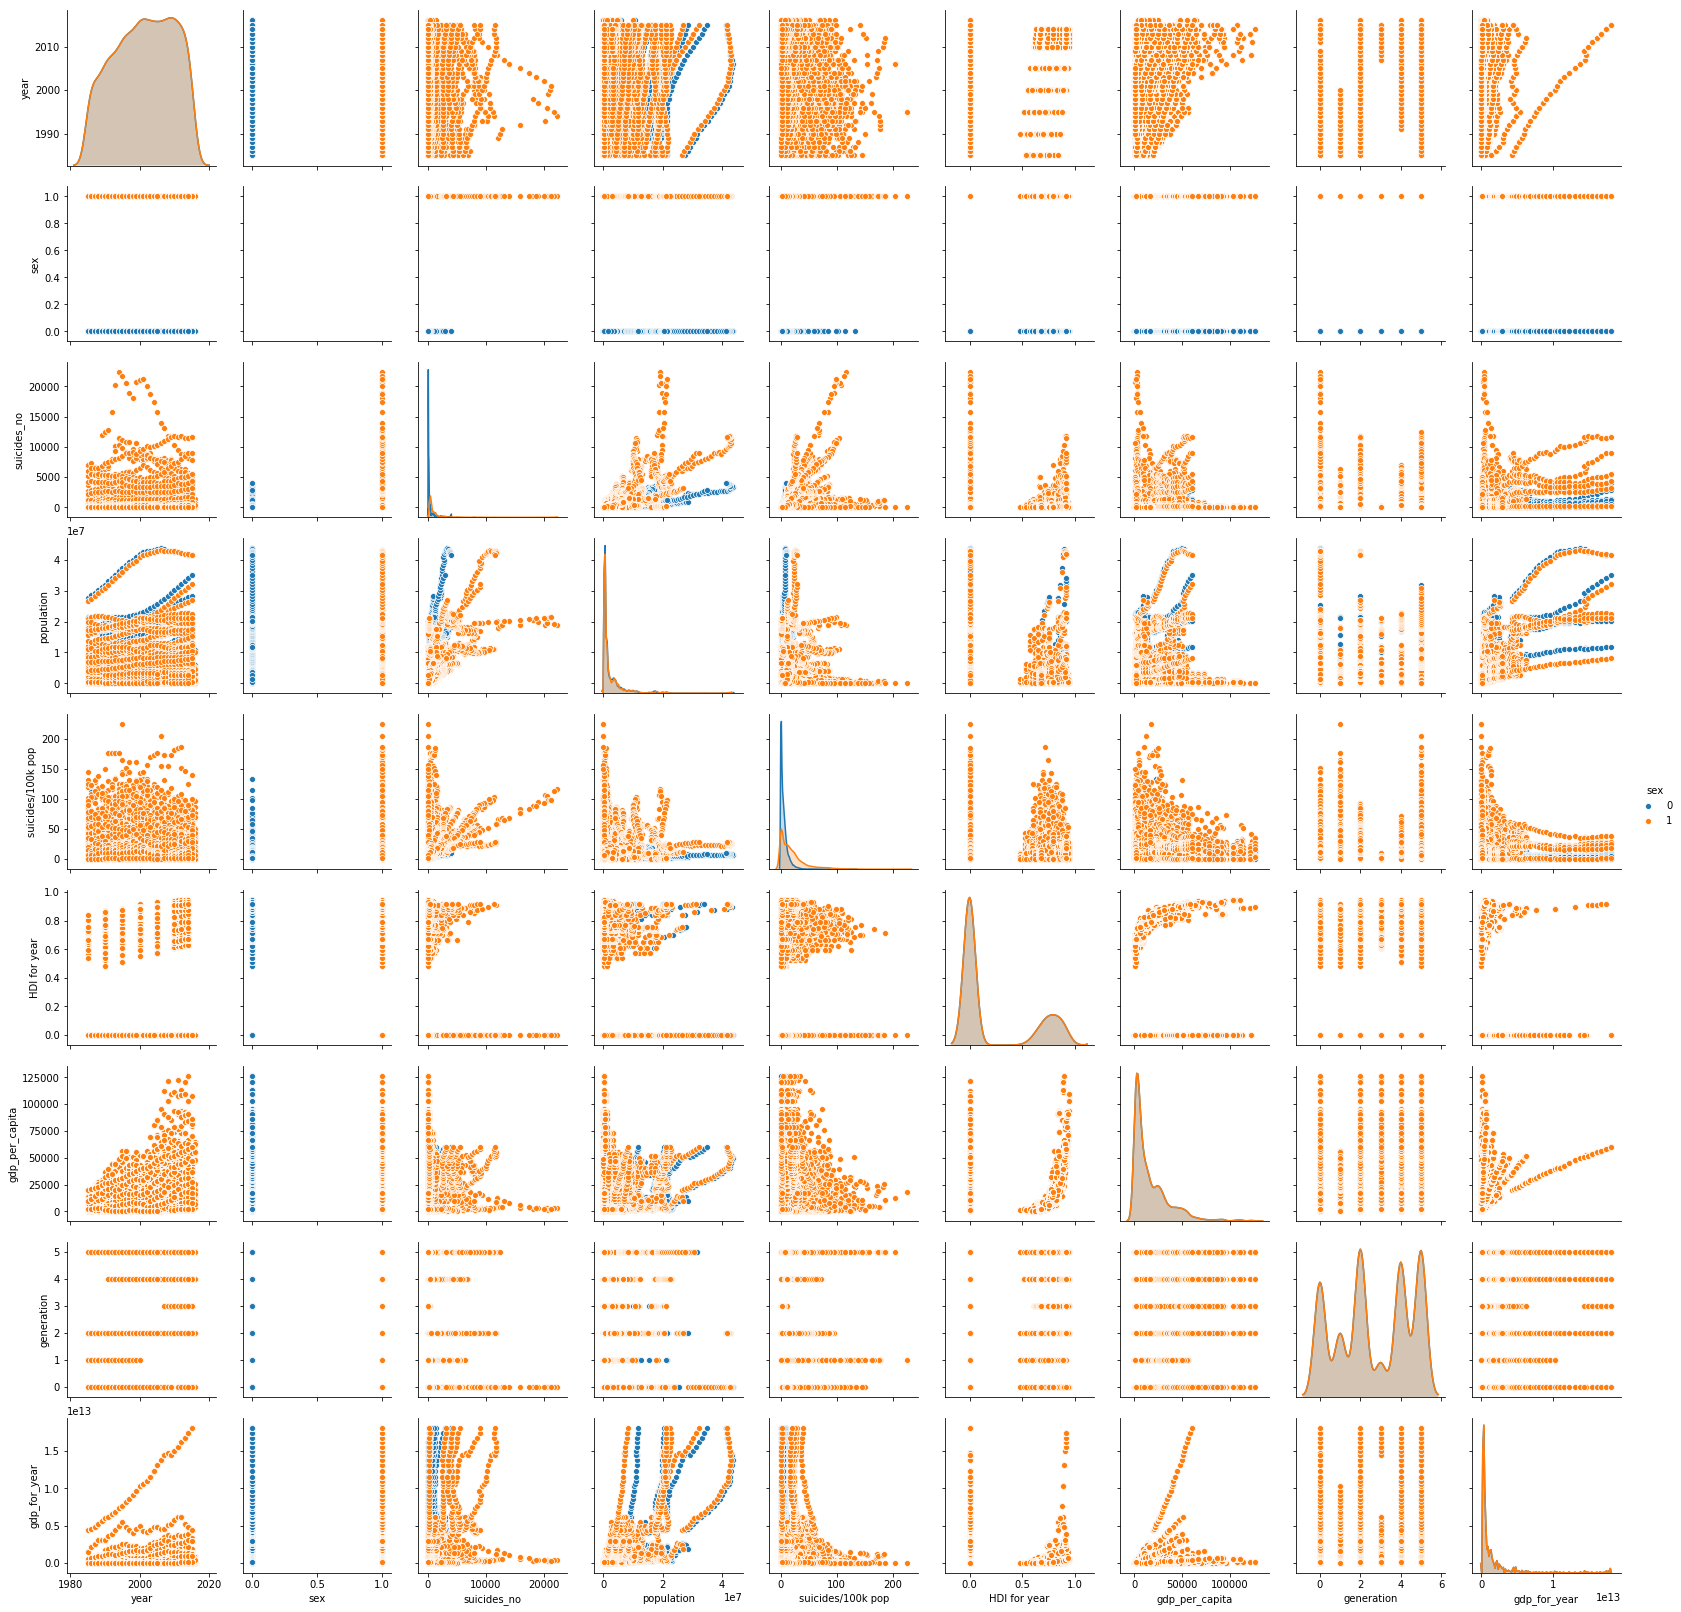

In [77]:
#Analysis Of all feautres 
sns.pairplot(data,hue="sex")

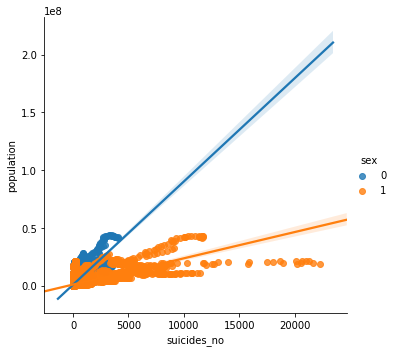

In [78]:
#Regressing Line Plotting
sns.lmplot(x="suicides_no",y="population",data=data,hue="sex")

In [ ]:
"""Conclusions:
1.After trying different regression algorithms randomforest came out to be best on giving 99% accuracy
2.Analysis of all feauture performed that how they change from period
3.Response variable mainly depends on population as by correlation matrix
"""